<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [193]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



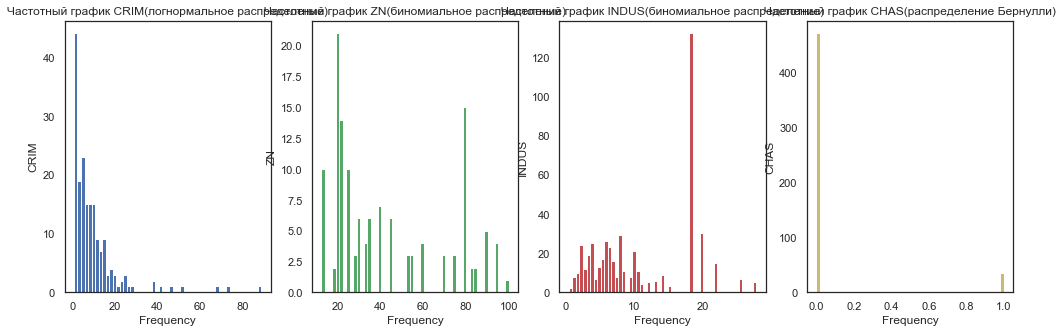

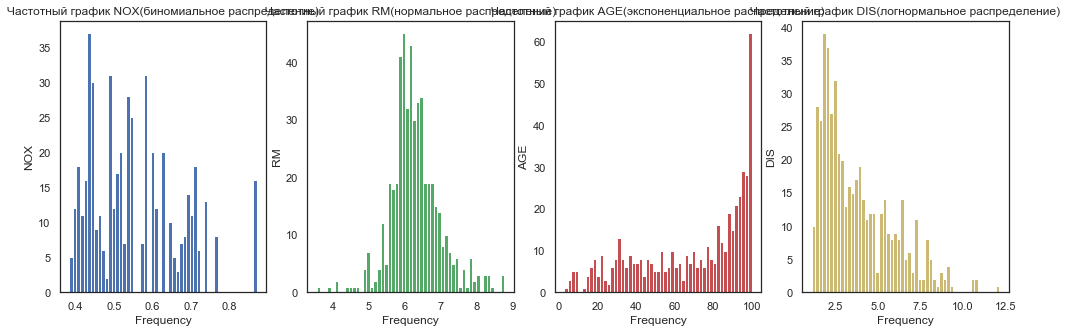

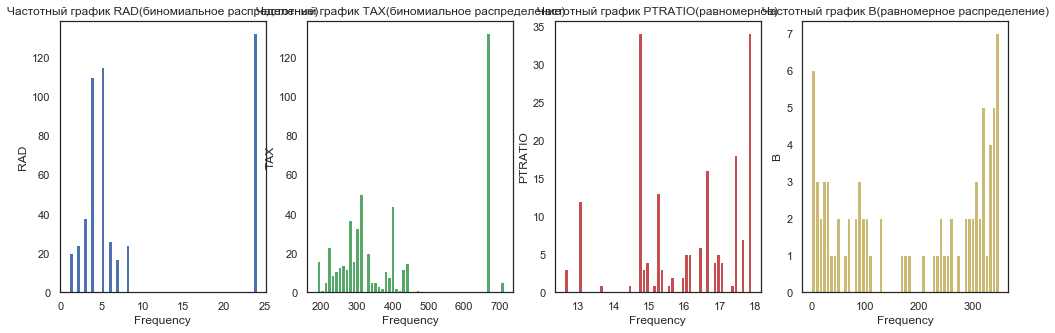

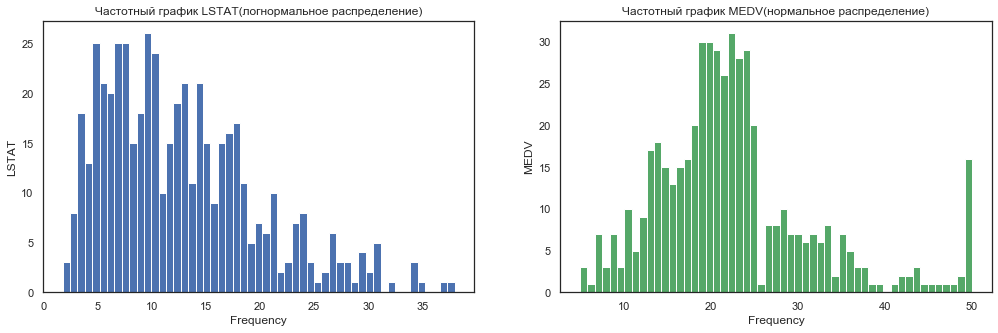

In [192]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,7
n_bins = 53
fig, axs = plt.subplots(1, 4, figsize=(17, 5))

CR = data['CRIM']
axs[0].hist(CR[CR > 0.8], bins=n_bins, facecolor='b')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('CRIM')
axs[0].set_title('Частотный график CRIM(логнормальное распределение)')

dataZN = data['ZN']
axs[1].hist(dataZN[dataZN > 0.5], bins=n_bins, facecolor='g')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('ZN')
axs[1].set_title('Частотный график ZN(биномиальное распределение)')

axs[2].hist(data['INDUS'], bins=n_bins, facecolor='r')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('INDUS')
axs[2].set_title('Частотный график INDUS(биномиальное распределение)')

axs[3].hist(data['CHAS'], bins=n_bins, facecolor='y')
axs[3].set_xlabel('Frequency')
axs[3].set_ylabel('CHAS')
axs[3].set_title('Частотный график CHAS(распределение Бернулли)')

fig, axd = plt.subplots(1, 4, figsize=(17, 5))

axd[0].hist(data['NOX'], bins=n_bins, facecolor='b')
axd[0].set_xlabel('Frequency')
axd[0].set_ylabel('NOX')
axd[0].set_title('Частотный график NOX(биномиальное распределение)')

axd[1].hist(data['RM'], bins=n_bins, facecolor='g')
axd[1].set_xlabel('Frequency')
axd[1].set_ylabel('RM')
axd[1].set_title('Частотный график RM(нормальное распределение)')

axd[2].hist(data['AGE'], bins=n_bins, facecolor='r')
axd[2].set_xlabel('Frequency')
axd[2].set_ylabel('AGE')
axd[2].set_title('Частотный график AGE(экспоненциальное распределение)')

axd[3].hist(data['DIS'], bins=n_bins, facecolor='y')
axd[3].set_xlabel('Frequency')
axd[3].set_ylabel('DIS')
axd[3].set_title('Частотный график DIS(логнормальное распределение)')

fig, axk = plt.subplots(1, 4, figsize=(17, 5))

axk[0].hist(data['RAD'], bins=n_bins, facecolor='b')
axk[0].set_xlabel('Frequency')
axk[0].set_ylabel('RAD')
axk[0].set_title('Частотный график RAD(биномиальное распределение)')

axk[1].hist(data['TAX'], bins=n_bins, facecolor='g')
axk[1].set_xlabel('Frequency')
axk[1].set_ylabel('TAX')
axk[1].set_title('Частотный график TAX(биномиальное распределение)')

TIO = data['PTRATIO']
axk[2].hist(TIO[TIO <18], bins=n_bins, facecolor='r')
axk[2].set_xlabel('Frequency')
axk[2].set_ylabel('PTRATIO')
axk[2].set_title('Частотный график PTRATIO(равномерное)')

Bb = data['B']
axk[3].hist(Bb[Bb < 350], bins=n_bins, facecolor='y')
axk[3].set_xlabel('Frequency')
axk[3].set_ylabel('B')
axk[3].set_title('Частотный график B(равномерное распределение)')

fig, axm = plt.subplots(1, 2, figsize=(17, 5))

axm[0].hist(data['LSTAT'], bins=n_bins, facecolor='b')
axm[0].set_xlabel('Frequency')
axm[0].set_ylabel('LSTAT')
axm[0].set_title('Частотный график LSTAT(логнормальное распределение)')

axm[1].hist(data['MEDV'], bins=n_bins, facecolor='g')
axm[1].set_xlabel('Frequency')
axm[1].set_ylabel('MEDV')
axm[1].set_title('Частотный график MEDV(нормальное распределение)')

plt.show()

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [84]:
MEDV_corr = np.round_(data.corr(), decimals=2)
MEDV_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [60]:
MEDV_corr['MEDV'].sort_values(ascending = False).head(2)

MEDV    1.0
RM      0.7
Name: MEDV, dtype: float64

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



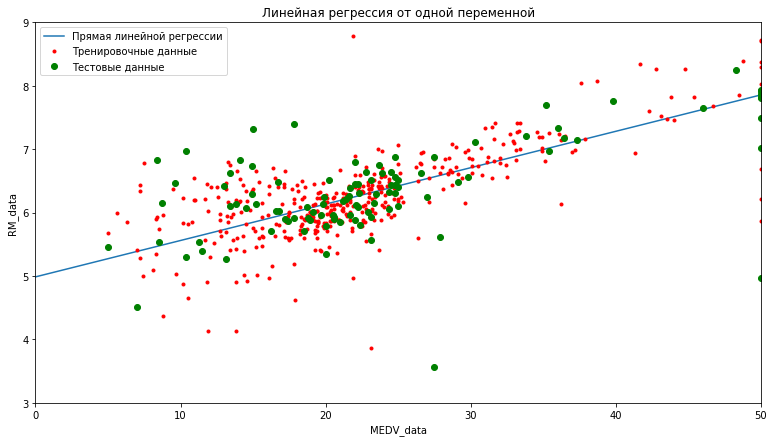

In [135]:
MEDV_data = data['MEDV']
RM_data = data['RM']
MEDV_data = np.array(MEDV_data).reshape(-1,1)
RM_data = np.array(RM_data).reshape(-1,1)

# 1.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    MEDV_data,
    RM_data,
    test_size = 0.2
)

# 2.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 3.
model.score(X_test, y_test)

# 4.
plt.xlabel('MEDV_data')
plt.ylabel('RM_data')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,50)
plt.ylim(3,9)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()
# Итоги: стоимость квартиры напрямую зависит от количества комнат в ней!

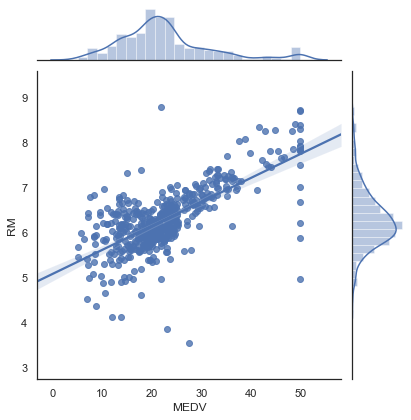

In [136]:
MEDV_data = data['MEDV']
RM_data = data['RM']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=MEDV_data, y=RM_data, data=data, kind='reg')
plt.show()
# Итоги: стоимость квартиры напрямую зависит от количества комнат в ней!

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [61]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data2=pd.read_csv(url)
data2.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [211]:
new = data2[['Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy']]
new_data2 = new.dropna()
mat_cov = []
for one in new_data2.columns:
    cov = []
    for two in new_data2.columns:
        cov.append(np.cov(new_data2[one], new_data2[two]))
    mat_cov.append(cov)
mat_cov

[[array([[2088.55066804, 2088.55066804],
         [2088.55066804, 2088.55066804]]),
  array([[2088.55066804, 1171.89280576],
         [1171.89280576, 2127.17014388]]),
  array([[2088.55066804, 1037.04069887],
         [1037.04069887, 1965.29311408]]),
  array([[2088.55066804, 1097.68016444],
         [1097.68016444, 1980.79527235]]),
  array([[2088.55066804, 1745.00719424],
         [1745.00719424, 2099.08633094]]),
  array([[2088.55066804, 1126.43720452],
         [1126.43720452, 2034.81932169]]),
  array([[2088.55066804,  437.43597122],
         [ 437.43597122, 1819.5352518 ]]),
  array([[2088.55066804,  992.82230216],
         [ 992.82230216, 2000.57446043]]),
  array([[2088.55066804, 1625.96176773],
         [1625.96176773, 1879.76957862]]),
  array([[2088.55066804, 1661.55015416],
         [1661.55015416, 1934.23694758]])],
 [array([[2127.17014388, 1171.89280576],
         [1171.89280576, 2088.55066804]]),
  array([[2127.17014388, 2127.17014388],
         [2127.17014388, 2127.1701

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [72]:
none = data2.isna().sum().sum()
print('Отсутствующие значения в таблице: '+str(none))
none_country = data2['Country (region)'].isna().sum()
print('Отсутствующие значения в выборке country: '+str(none_country))

Отсутствующие значения в таблице: 23
Отсутствующие значения в выборке country: 0


Сколько стран в выборке? Написать ответ. 

In [82]:
len_country  = len(data2['Country (region)'].unique())
print('Количество стран: '+str(len_country))

Количество стран: 156


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

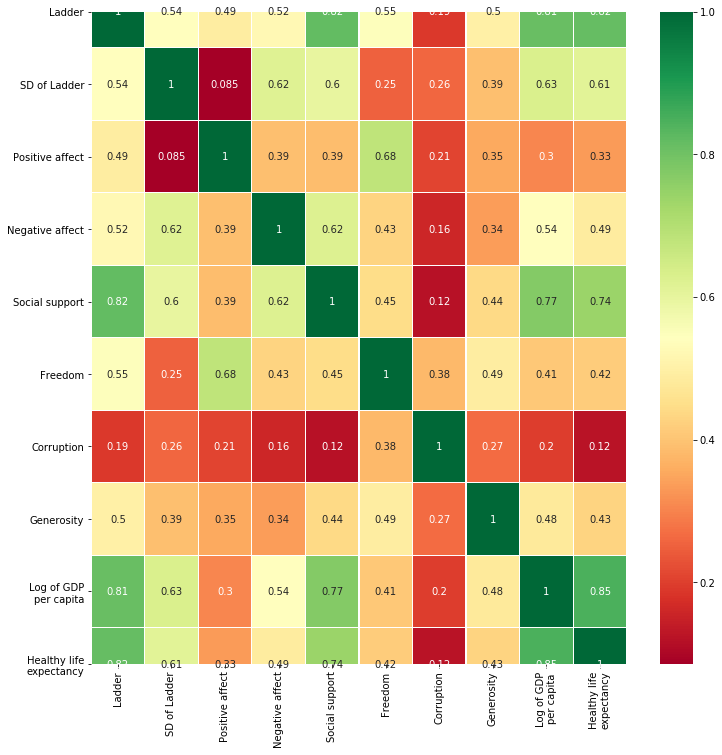

In [87]:
import seaborn as sns
sns.heatmap(data2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()
# все выборки, которые связаны с коррупцией, имеют слабую связь(как и зна)

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

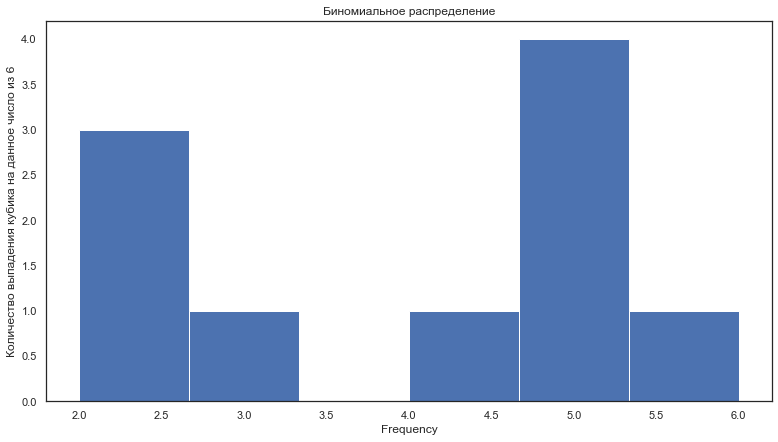

In [169]:
import random

cube = [1, 2, 3, 4, 5, 6]
info = []
for i in range(0,10):
    info.append(random.choice(cube))

plt.hist(info, 6)
plt.xlabel('Frequency')
plt.ylabel('Количество выпадения кубика на данное число из 6')
plt.title('Биномиальное распределение')
plt.show()

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

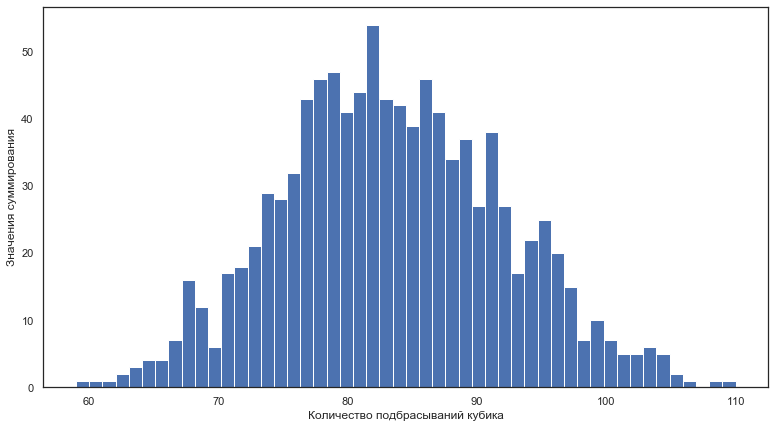

91.0


In [247]:
sum_binom = np.zeros([1000])
for i in range(1000):
    data_binom = stats.binom.rvs(n=5,p=0.167,size=100)
    sum_binom[i] = np.sum(data_binom)
plt.hist(sum_binom, 50)
plt.xlabel('Количество подбрасываний кубика')
plt.ylabel('Значения суммирования')
plt.show() 